/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


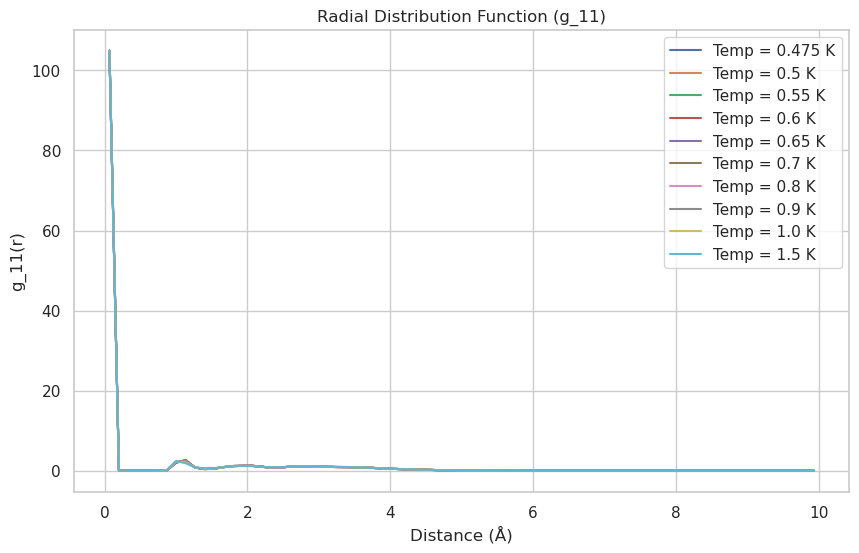

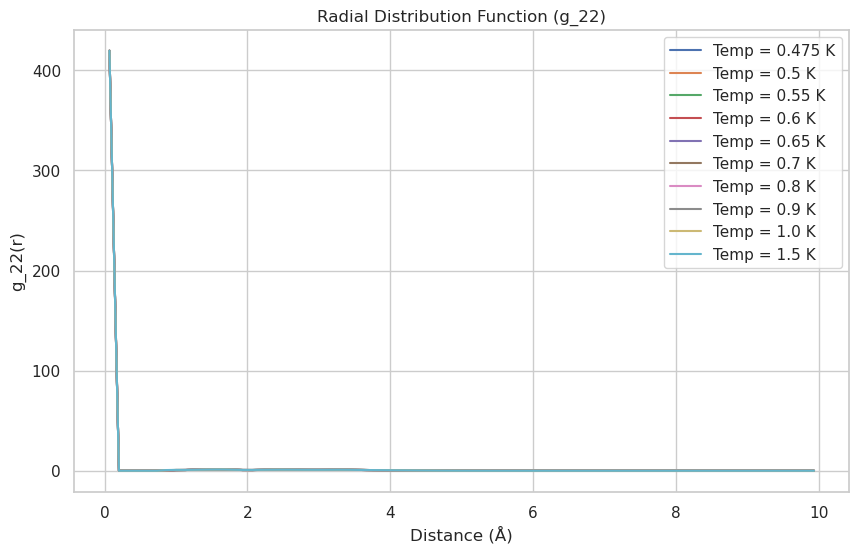

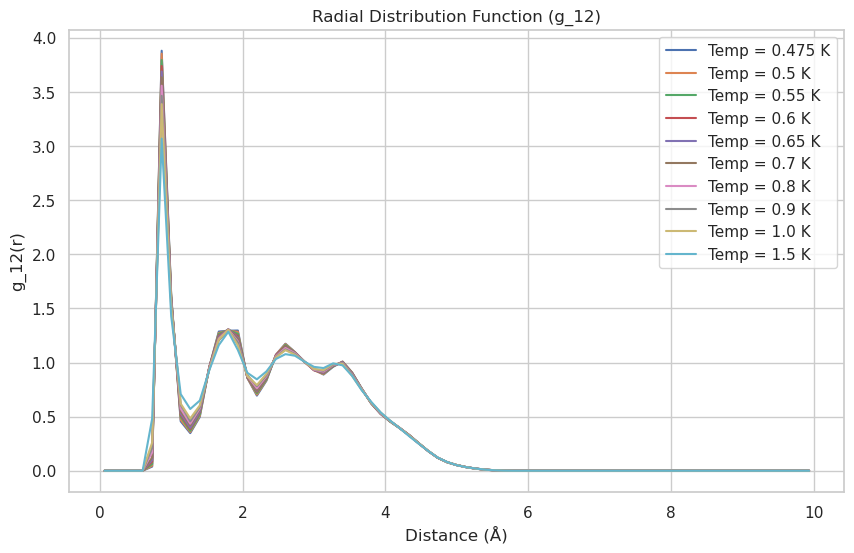

In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from MDAnalysis.analysis import rdf

# Set Seaborn style for better visuals
sns.set(style="whitegrid", palette="deep")

# Mapping of temperatures to their respective .lammpstrj and .dcd files
temperature_files = {
    0.475: {"lammpstrj": "0.475.lammpstrj", "dcd": "0.475.dcd"},
    0.500: {"lammpstrj": "0.500.lammpstrj", "dcd": "0.500.dcd"},
    0.550: {"lammpstrj": "0.550.lammpstrj", "dcd": "0.550.dcd"},
    0.600: {"lammpstrj": "0.600.lammpstrj", "dcd": "0.600.dcd"},
    0.650: {"lammpstrj": "0.650.lammpstrj", "dcd": "0.650.dcd"},
    0.700: {"lammpstrj": "0.700.lammpstrj", "dcd": "0.700.dcd"},
    0.800: {"lammpstrj": "0.800.lammpstrj", "dcd": "0.800.dcd"},
    0.900: {"lammpstrj": "0.900.lammpstrj", "dcd": "0.900.dcd"},
    1.000: {"lammpstrj": "1.000.lammpstrj", "dcd": "1.000.dcd"},
    1.500: {"lammpstrj": "1.500.lammpstrj", "dcd": "1.500.dcd"}
}

# Function to calculate RDF between two types of atoms
def calculate_rdf(temp, lammpstrj_file, dcd_file, selection1, selection2):
    # Load the universe (LAMMPS trajectory and DCD file)
    universe = mda.Universe(lammpstrj_file, dcd_file, topology_format='LAMMPSDUMP')
    
    # Calculate RDF (Radial Distribution Function)
    rdf = mda.analysis.rdf.InterRDF(selection1, selection2, range=(0.0, 10.0), bins=100)
    rdf.run()
    
    # Return the results
    return rdf

# List to store RDF results for plotting (g_11, g_22, g_12)
rdf_results_11 = []
rdf_results_22 = []
rdf_results_12 = []

# Loop through each temperature and calculate RDF for all combinations
for temp, files in temperature_files.items():
    lammpstrj_file = files["lammpstrj"]
    dcd_file = files["dcd"]
    
    if os.path.exists(lammpstrj_file) and os.path.exists(dcd_file):
        # Load the universe to get atom selections for types 1 and 2
        universe = mda.Universe(lammpstrj_file, dcd_file, topology_format='LAMMPSDUMP')
        
        # Select type 1 and type 2 atoms (you can adjust the selection criteria)
        # Example: atoms of type 1 and type 2 are selected by 'type 1' and 'type 2'
        type1_selection = universe.select_atoms("type 1")  # Adjust according to your system
        type2_selection = universe.select_atoms("type 2")  # Adjust according to your system
        
        # Calculate g_11(r) between type 1 and type 1
        rdf_11 = calculate_rdf(temp, lammpstrj_file, dcd_file, type1_selection, type1_selection)
        rdf_results_11.append((temp, rdf_11.results.rdf, rdf_11.results.bins))
        
        # Calculate g_22(r) between type 2 and type 2
        rdf_22 = calculate_rdf(temp, lammpstrj_file, dcd_file, type2_selection, type2_selection)
        rdf_results_22.append((temp, rdf_22.results.rdf, rdf_22.results.bins))
        
        # Calculate g_12(r) between type 1 and type 2
        rdf_12 = calculate_rdf(temp, lammpstrj_file, dcd_file, type1_selection, type2_selection)
        rdf_results_12.append((temp, rdf_12.results.rdf, rdf_12.results.bins))
        
    else:
        print(f"Files missing for temperature {temp}: {lammpstrj_file} or {dcd_file}")

# Plot the RDF for type 1 vs type 1 (g_11)
plt.figure(figsize=(10, 6))
for temp, rdf, bins in rdf_results_11:
    plt.plot(bins, rdf, label=f"Temp = {temp} K")

plt.xlabel("Distance (Å)")
plt.ylabel("g_11(r)")
plt.title("Radial Distribution Function (g_11)")
plt.legend()
plt.grid(True)
plt.savefig('RDF_g_11.png', format='png')
plt.show()

# Plot the RDF for type 2 vs type 2 (g_22)
plt.figure(figsize=(10, 6))
for temp, rdf, bins in rdf_results_22:
    plt.plot(bins, rdf, label=f"Temp = {temp} K")

plt.xlabel("Distance (Å)")
plt.ylabel("g_22(r)")
plt.title("Radial Distribution Function (g_22)")
plt.legend()
plt.grid(True)
plt.savefig('RDF_g_22.png', format='png')
plt.show()

# Plot the RDF for type 1 vs type 2 (g_12)
plt.figure(figsize=(10, 6))
for temp, rdf, bins in rdf_results_12:
    plt.plot(bins, rdf, label=f"Temp = {temp} K")

plt.xlabel("Distance (Å)")
plt.ylabel("g_12(r)")
plt.title("Radial Distribution Function (g_12)")
plt.legend()
plt.grid(True)
plt.savefig('RDF_g_12.png', format='png')
plt.show()


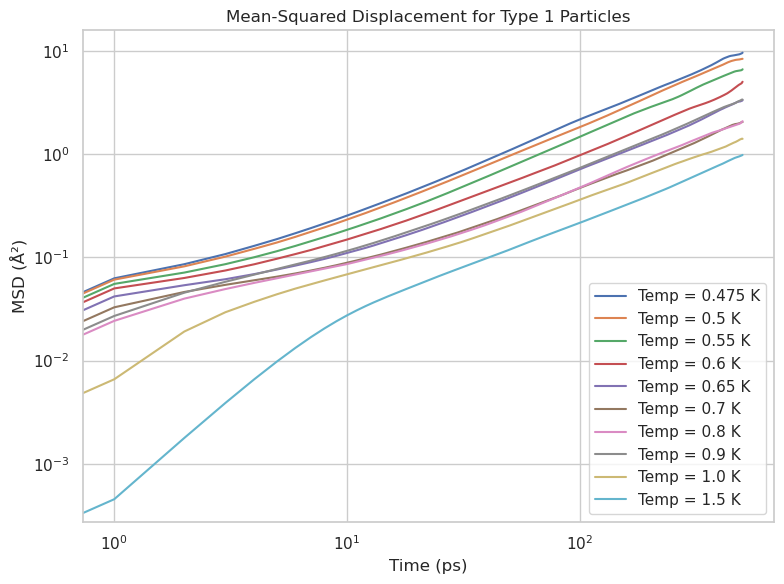

In [13]:
import MDAnalysis as mda
import MDAnalysis.analysis.msd as msd
import matplotlib.pyplot as plt

# Mapping of temperatures to their respective .lammpstrj and .dcd files
temperature_files = {
    0.475: {"lammpstrj": "0.475.lammpstrj", "dcd": "0.475.dcd"},
    0.500: {"lammpstrj": "0.500.lammpstrj", "dcd": "0.500.dcd"},
    0.550: {"lammpstrj": "0.550.lammpstrj", "dcd": "0.550.dcd"},
    0.600: {"lammpstrj": "0.600.lammpstrj", "dcd": "0.600.dcd"},
    0.650: {"lammpstrj": "0.650.lammpstrj", "dcd": "0.650.dcd"},
    0.700: {"lammpstrj": "0.700.lammpstrj", "dcd": "0.700.dcd"},
    0.800: {"lammpstrj": "0.800.lammpstrj", "dcd": "0.800.dcd"},
    0.900: {"lammpstrj": "0.900.lammpstrj", "dcd": "0.900.dcd"},
    1.000: {"lammpstrj": "1.000.lammpstrj", "dcd": "1.000.dcd"},
    1.500: {"lammpstrj": "1.500.lammpstrj", "dcd": "1.500.dcd"}
}

# Create a plot for MSD on a log-log scale
plt.figure(figsize=(8, 6))

# Loop over the temperatures and corresponding files
for temp, files in temperature_files.items():
    # Load the universe for each temperature's .lammpstrj and .dcd files
    u = mda.Universe(files["lammpstrj"], files["dcd"], topology_format="LAMMPSDUMP")

    # Select type 1 particles
    type1 = u.select_atoms("type 1")

    # Compute MSD for type 1 particles using EinsteinMSD
    msd_analysis = msd.EinsteinMSD(u, select='type 1', msd_type='xyz', fft=True)
    msd_analysis.run()


    # Check if timeseries is a 1D array and plot accordingly
    if msd_analysis.results.timeseries.ndim == 1:
        plt.plot(msd_analysis.results.timeseries, label=f"Temp = {temp} K")
    else:
        plt.plot(msd_analysis.results.timeseries[:, 0], msd_analysis.results.timeseries[:, 1], label=f"Temp = {temp} K")

# Customize the plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Time (ps)")
plt.ylabel("MSD (Å²)")
plt.title("Mean-Squared Displacement for Type 1 Particles")
plt.legend()
plt.tight_layout()

# Show the plot
plt.savefig('MSD_Type_1.png', format='png')
plt.show()


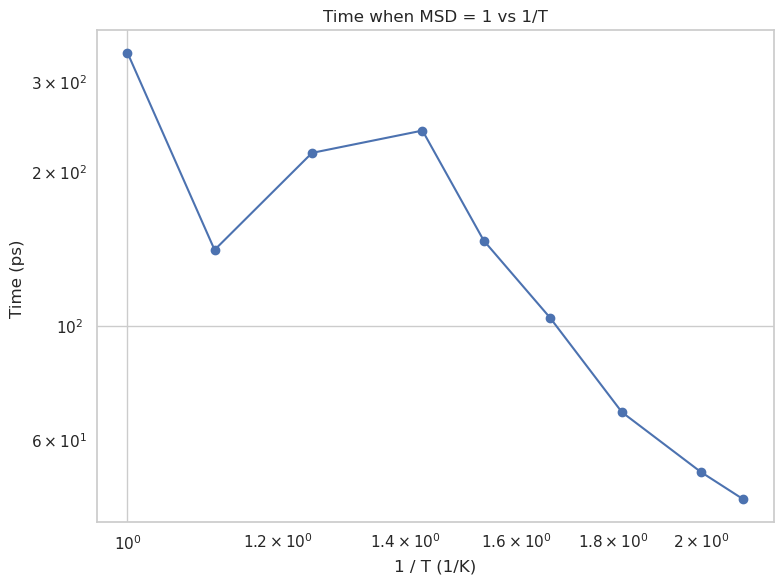

In [11]:
import MDAnalysis as mda
import MDAnalysis.analysis.msd as msd
import matplotlib.pyplot as plt
import numpy as np


# Mapping of temperatures to their respective .lammpstrj and .dcd files
temperature_files = {
    0.475: {"lammpstrj": "0.475.lammpstrj", "dcd": "0.475.dcd"},
    0.500: {"lammpstrj": "0.500.lammpstrj", "dcd": "0.500.dcd"},
    0.550: {"lammpstrj": "0.550.lammpstrj", "dcd": "0.550.dcd"},
    0.600: {"lammpstrj": "0.600.lammpstrj", "dcd": "0.600.dcd"},
    0.650: {"lammpstrj": "0.650.lammpstrj", "dcd": "0.650.dcd"},
    0.700: {"lammpstrj": "0.700.lammpstrj", "dcd": "0.700.dcd"},
    0.800: {"lammpstrj": "0.800.lammpstrj", "dcd": "0.800.dcd"},
    0.900: {"lammpstrj": "0.900.lammpstrj", "dcd": "0.900.dcd"},
    1.000: {"lammpstrj": "1.000.lammpstrj", "dcd": "1.000.dcd"},
    1.500: {"lammpstrj": "1.500.lammpstrj", "dcd": "1.500.dcd"}
}

# Prepare a list to store the times when MSD = 1
times_at_msd_1 = []
temperatures = []

# Loop over the temperatures and corresponding files
for temp, files in temperature_files.items():
    # Load the universe for each temperature's .lammpstrj and .dcd files
    u = mda.Universe(files["lammpstrj"], files["dcd"], topology_format="LAMMPSDUMP")

    # Select type 1 particles
    type1 = u.select_atoms("type 1")

    # Compute MSD for type 1 particles using EinsteinMSD
    msd_analysis = msd.EinsteinMSD(u, select='type 1', msd_type='xyz', fft=True)
    msd_analysis.run()

    # Extract the time and MSD values (handling 1D case)
    timeseries = msd_analysis.results.timeseries
    if timeseries.ndim == 1:
        # In this case, the timeseries is 1D (contains MSD values over time)
        time = np.arange(len(timeseries))  # Generate time points
        msd_vals = timeseries
    else:
        # In case of 2D (time, MSD)
        time = timeseries[:, 0]
        msd_vals = timeseries[:, 1]


    # Find the time when MSD first exceeds 1
    # We use np.where to find the first index where MSD >= 1
    indices = np.where(msd_vals >= 1)[0]
    
    if len(indices) > 0:
        # If we find at least one index, take the first occurrence
        time_at_msd_1 = time[indices[0]]
        # Store the time and temperature
        times_at_msd_1.append(time_at_msd_1)
        temperatures.append(temp)
    else:
        # If no MSD value reaches 1, print a message and skip this temperature
        print(f"Warning: MSD never reaches 1 for Temperature: {temp} K")

# plot the time vs 1/T
if len(times_at_msd_1) > 0:
    times_at_msd_1 = np.array(times_at_msd_1)
    temperatures = np.array(temperatures)

    # Calculate 1/T
    inverse_temperatures = 1 / temperatures

    # Plot the time vs 1/T on a log-log scale
    plt.figure(figsize=(8, 6))
    plt.loglog(inverse_temperatures, times_at_msd_1, marker='o', linestyle='-', color='b')

    # Customize the plot
    plt.xlabel("1 / T (1/K)")
    plt.ylabel("Time (ps) ")
    plt.title("Time when MSD = 1 vs 1/T")
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.savefig('Time_When_MSD.png', format='png')
    plt.show()
